In [83]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pathlib
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import load_img, img_to_array

data_root_orig = tf.keras.utils.get_file(origin='https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz',
                                         fname='notMNIST_small', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

/home/maxim/.keras/datasets/notMNIST_small


In [2]:
for letter_dir in data_root.iterdir():
  print(letter_dir)

/home/maxim/.keras/datasets/notMNIST_small/F
/home/maxim/.keras/datasets/notMNIST_small/B
/home/maxim/.keras/datasets/notMNIST_small/H
/home/maxim/.keras/datasets/notMNIST_small/G
/home/maxim/.keras/datasets/notMNIST_small/D
/home/maxim/.keras/datasets/notMNIST_small/I
/home/maxim/.keras/datasets/notMNIST_small/C
/home/maxim/.keras/datasets/notMNIST_small/A
/home/maxim/.keras/datasets/notMNIST_small/J
/home/maxim/.keras/datasets/notMNIST_small/E


In [3]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

18724

In [4]:
all_image_paths[:10]

import IPython.display as display

for n in range(5):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(image_path)

/home/maxim/.keras/datasets/notMNIST_small/D/Q2xlb3BhdHJhLm90Zg==.png


/home/maxim/.keras/datasets/notMNIST_small/B/Q2xlcmZhY2UtRGVtaUJvbGQub3Rm.png


/home/maxim/.keras/datasets/notMNIST_small/F/QXVndXN0YVN0ZC1SZWd1bGFyLm90Zg==.png


/home/maxim/.keras/datasets/notMNIST_small/I/RlogQkFTSUMgMTIudHRm.png


/home/maxim/.keras/datasets/notMNIST_small/H/QUdCdWNoUm91bmRlZEJRLUJvbGRPdXRsaW5lLm90Zg==.png


In [5]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [6]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [7]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])
print("First 10 paths: ", all_image_paths[:10])

First 10 labels indices:  [4, 8, 7, 9, 3, 6, 2, 9, 5, 0]
First 10 paths:  ['/home/maxim/.keras/datasets/notMNIST_small/E/QmVhY2ggVGhpbiBCb2xkLnR0Zg==.png', '/home/maxim/.keras/datasets/notMNIST_small/I/Qm9va21hblN0ZC1Cb2xkSXRhbGljLm90Zg==.png', '/home/maxim/.keras/datasets/notMNIST_small/H/SVRDIEdvdWR5IFNhbnMgQm9sZC5wZmI=.png', '/home/maxim/.keras/datasets/notMNIST_small/J/QXJpYWxNVFN0ZC5vdGY=.png', '/home/maxim/.keras/datasets/notMNIST_small/D/QmVsdWNpYW4tRGVtaUJvbGQub3Rm.png', '/home/maxim/.keras/datasets/notMNIST_small/G/Rm9ybWFsNDM2IEJULnR0Zg==.png', '/home/maxim/.keras/datasets/notMNIST_small/C/QXVyZWFVbHRyYS1JdGFsaWMub3Rm.png', '/home/maxim/.keras/datasets/notMNIST_small/J/Qm9va21hbiBCVCBJdGFsaWMudHRm.png', '/home/maxim/.keras/datasets/notMNIST_small/F/SVRDIFRpZXBvbG8gQm9vay5wZmI=.png', '/home/maxim/.keras/datasets/notMNIST_small/A/R2VzdGFsdC1IVEYtTGluZWFyLU1lZGl1bS5vdGY=.png']


In [104]:
VALIDATION_SET_RATE = 0.05

# define image generators for train, validation and test set
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
#     shear_range=0.4,
#     zoom_range=0.4,
#     horizontal_flip=True,
    validation_split=VALIDATION_SET_RATE
)

BATCH_SIZE = 32
IMG_HEIGHT = 28
IMG_WIDTH = 28
IMG_CHANNELS = 3
EPOCHS_COUNT = 20



train_data_gen = image_generator.flow_from_directory(directory=str(data_root),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='training')
STEPS_PER_EPOCH_TRAIN = np.ceil(train_data_gen.samples/BATCH_SIZE)

validation_data_gen = image_generator.flow_from_directory(directory=str(data_root),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='validation')

STEPS_PER_EPOCH_VALIDATION = np.ceil(validation_data_gen.samples/BATCH_SIZE)

Found 17794 images belonging to 10 classes.
Found 930 images belonging to 10 classes.


In [122]:
model = keras.Sequential([
        layers.Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax', name='output')
    ])
model.summary()

cbks = [tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.1 * 0.5 ** (epoch // 1))]
    
# Compile model
model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=validation_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH_TRAIN,
    validation_steps=STEPS_PER_EPOCH_VALIDATION,
    epochs=EPOCHS_COUNT,
    callbacks=cbks)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
flatten_35 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,624,010
Trainable params: 1,624,010
Non-trainable params: 0
___________________________________________

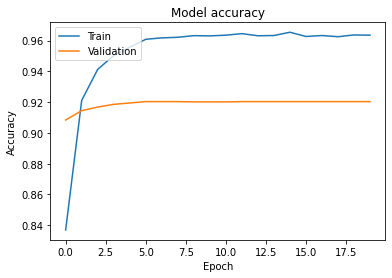

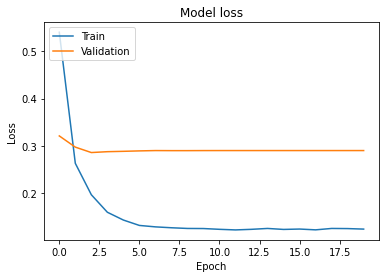

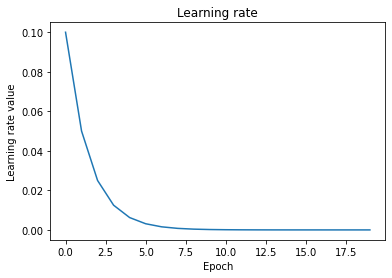

In [69]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['lr'])
plt.title('Learning rate')
plt.ylabel('Learning rate value')
plt.xlabel('Epoch')
plt.show()

In [119]:
def load_image(filename, image_size):
    w, h = image_size
    # load the image
    img = load_img(filename, target_size=(w, h))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, w, h, 3)
    # center pixel data
    img = img.astype('float32')
    return img

img = load_image(str(data_root) + "/E/QmVhY2ggVGhpbiBCb2xkLnR0Zg==.png", (28, 28))

In [124]:
# lets predict E
model.predict(img)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)